# Notebook to assist decisions on CM map settings

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
#import matplotlib.cbook as cbook
#import seaborn as sns
import geopandas as gpd
import sqlalchemy as sa

In [2]:
from viewser.operations import fetch
from viewser import Queryset, Column

from views_mapper2.label_writer import *
from views_mapper2.mapper2 import *
from views_mapper2.BBoxWriter import *
from views_mapper2.dictionary_writer import *

from ingester3.config import source_db_path

In [3]:
# Fetch geometries for plotting

engine = sa.create_engine(source_db_path) 
gdf_ci_master = gpd.GeoDataFrame.from_postgis(
    "SELECT id as country_id, name, in_africa, in_me, geom FROM prod.country",
    engine,
    geom_col='geom'
)
gdf_ci_master = gdf_ci_master.to_crs(4326)

In [4]:
# Fetch sample data

qs = Queryset('fatalities002_API_predictors_cm','country_month') # Change to queryset and level of analysis of interest

data = qs.fetch()

Queryset fatalities002_API_predictors_cm read successfully 


In [5]:
data.describe()

,ucdp_ged_sb_best_sum,ucdp_ged_os_best_sum,ucdp_ged_ns_best_sum,vdem_v2x_rule,vdem_v2x_gender,vdem_v2x_civlib,vdem_v2xcl_acjst,vdem_v2xeg_eqdr,vdem_v2x_libdem,wb_wdi_ny_gdp_pcap_kd,wb_wdi_sp_dyn_le00_in,wb_wdi_se_prm_nenr,wb_wdi_sp_pop_totl,wb_wdi_sp_dyn_imrt_in
count,158230.000000,158230.000000,158230.000000,86968.000000,86169.000000,86968.000000,86968.000000,86968.000000,86704.000000,84167.000000,85920.000000,44178.000000,9.016600e+04,89878.000000
mean,14.540296,7.480642,2.467686,0.528039,0.656314,0.638302,0.615252,0.577583,0.371909,10586.985815,66.946202,86.072086,3.373708e+07,38.446563
std,501.752554,1601.758263,63.220553,0.312904,0.213835,0.278134,0.285808,0.286448,0.276866,15826.228899,9.981905,16.185295,1.268511e+08,35.359617
min,0.000000,0.000000,0.000000,0.009000,0.026000,0.015000,0.008000,0.017000,0.005000,165.934266,14.098000,14.308450,7.635000e+03,1.600000
25%,0.000000,0.000000,0.000000,0.249000,0.499000,0.406750,0.372000,0.314000,0.114000,1383.079293,60.398000,84.105880,1.806890e+06,10.700000
50%,0.000000,0.000000,0.000000,0.514000,0.695000,0.717000,0.660000,0.620000,0.307000,3785.552798,69.306000,92.274850,7.088906e+06,25.700000
75%,0.000000,0.000000,0.000000,0.840000,0.838000,0.888000,0.871000,0.863000,0.627000,11805.671841,74.480488,96.435790,2.190644e+07,57.400000
max,124427.000000,629870.000000,11133.000000,0.999000,0.961000,0.976000,0.996000,0.986000,0.897000,114047.906127,84.615610,100.000000,1.412360e+09,189.900000


In [6]:
data.head()

ucdp_ged_sb_best_sum  ucdp_ged_os_best_sum  \
month_id country_id                                               
1        1                              0                     0   
         2                              0                     0   
         3                              0                     0   
         4                              0                     0   
         5                              0                     0   

                     ucdp_ged_ns_best_sum  vdem_v2x_rule  vdem_v2x_gender  \
month_id country_id                                                         
1        1                              0          0.461            0.747   
         2                              0          0.682            0.608   
         3                              0          0.872            0.645   
         4                              0          0.562            0.727   
         5                              0            NaN              NaN   

                     vdem_v2x_civlib  vdem_v2xcl_acjst  vdem_v2xeg_eqdr  \
month_id country_id                                                       
1        1                     0.581             0.774            0.630   
         2                     0.540             0.583            0.592   
         3                     0.877             0.904            0.649   
         4                     0.873             0.648            0.633   
         5                       NaN               NaN              NaN   

                     vdem_v2x_libdem  wb_wdi_ny_gdp_pcap_kd  \
month_id country_id                                           
1        1                     0.182            3231.783461   
         2                     0.175            7115.062369   
         3                     0.552            8593.171355   
         4                     0.602                    NaN   
         5                       NaN                    NaN   

                     wb_wdi_sp_dyn_le00_in  wb_wdi_se_prm_nenr  \
month_id country_id                                              
1        1                          61.229                 NaN   
         2                          62.034                 NaN   
         3                          67.572             86.2554   
         4                          68.762                 NaN   
         5                          64.748                 NaN   

                     wb_wdi_sp_pop_totl  wb_wdi_sp_dyn_imrt_in  
month_id country_id                                             
1        1                     778176.0                   53.1  
         2                     375112.0                    NaN  
         3                    1127852.0                   34.2  
         4                   15210443.0                   35.3  
         5                     164905.0                   35.3

# Select month to plot

In [7]:
# Call the function

def vid2date(i):
    year=str(ViewsMonth(i).year)
    month=str(ViewsMonth(i).month)
    return year+'/'+monthb

**Enter year and month below to print the correlated `month_id`**

In [8]:
print(ViewsMonth.from_year_month(year=2024, month=9)) 

ViewsMonth(id=537) #=> year:2024, month:9


**Enter the printed month ID to plot**

In [9]:
chosen_month=537

# Select feature to map

In [10]:
feature = 'ucdp_ged_sb_best_sum'

# Select mapping settings

Match map dictionary with applied data transformation:

- Non-logged data with non-logged dictionary
- ln data with 1p dictionary
- ln2 data with 2p dictionary

# Choose dictionary for plotting

## Create new dictionaries at single-log (1p) scale 

In [11]:
# Create dict for viridis | single log | 0-1000 

scale_1p_0_1000 = [0, 1, 3, 10, 30, 100, 300, 500, 700, 1000] # list the raw values you want marked on the color bar legend as tick values
dict_1p_0_1000 = log1p_dict(scale_1p_0_1000)
dict_1p_0_1000

{'0': 0.0,
 '1': 0.6931471805599453,
 '3': 1.3862943611198906,
 '10': 2.3978952727983707,
 '30': 3.4339872044851463,
 '100': 4.61512051684126,
 '300': 5.707110264748875,
 '500': 6.2166061010848646,
 '700': 6.55250788703459,
 '1000': 6.90875477931522}

In [12]:
# Create dict for viridis | single log | 0-100

scale_1p_0_100 = [0, 1, 3, 10, 30, 50, 70, 100] # list the raw values you want marked on the color bar legend as tick values
dict_1p_0_100 = log1p_dict(scale_1p_0_100)
dict_1p_0_100

{'0': 0.0,
 '1': 0.6931471805599453,
 '3': 1.3862943611198906,
 '10': 2.3978952727983707,
 '30': 3.4339872044851463,
 '50': 3.9318256327243257,
 '70': 4.2626798770413155,
 '100': 4.61512051684126}

In [13]:
# Create dict for viridis | single log | 0-500

scale_1p_0_500 = [0, 1, 3, 10, 30, 50, 70, 100, 300, 500] # list the raw values you want marked on the color bar legend as tick values
dict_1p_0_500 = log1p_dict(scale_1p_0_500)
dict_1p_0_500

{'0': 0.0,
 '1': 0.6931471805599453,
 '3': 1.3862943611198906,
 '10': 2.3978952727983707,
 '30': 3.4339872044851463,
 '50': 3.9318256327243257,
 '70': 4.2626798770413155,
 '100': 4.61512051684126,
 '300': 5.707110264748875,
 '500': 6.2166061010848646}

In [14]:
# Create dict for viridis | single log | 0-20k

scale_1p_0_20k = [0, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 15000, 20000 ] # list the raw values you want marked on the color bar legend as tick values
dict_1p_0_20k = log1p_dict(scale_1p_0_20k)
dict_1p_0_20k

# To use this dict on a map, change 'map_dictionary' in the map settings to the name of your new dict. 

{'0': 0.0,
 '1': 0.6931471805599453,
 '3': 1.3862943611198906,
 '10': 2.3978952727983707,
 '30': 3.4339872044851463,
 '100': 4.61512051684126,
 '300': 5.707110264748875,
 '1000': 6.90875477931522,
 '3000': 8.006700845440367,
 '10000': 9.210440366976517,
 '15000': 9.61587214452889,
 '20000': 9.90353755128617}

In [15]:
# Function to create a new dictionary at single-log (1p) scale

name_your_1p_scale = [0, 1, 3, 10, 30, 100, 300, 500, 700, 1000] # list the raw values you want marked on the color bar legend as tick values
name_your_dictionary = log1p_dict(name_your_1p_scale)

# To use this dict on a map, change 'map_dictionary' in the map settings to the name of your new dict. 

## Create new dictionaries at linear scale 

In [16]:
# Create index, 0-10

raw_values = np.array([0,1,2,3,4,5,6,7,8,9,10])
ticklabels = [str(tv) for tv in raw_values]
dictionary_index_0_10 = dict(zip(ticklabels, raw_values))
dictionary_index_0_10

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10': 10}

## Select data transform for plotting

In [17]:
transform='ln_'     # , ln_, ln2_

In [18]:
# Executes the transforms

if transform == 'ln_':
    data[f'{transform}'+f'{feature}'] = np.log1p(data[f'{feature}'])
    print('ln1 transform applied')

elif transform == 'ln2_':
    data[f'{transform}'+f'{feature}'] = np.log1p(np.log1p(data[f'{feature}']))
    print('ln2 transform applied')


else: print("No transform applied")

ln1 transform applied


## Select color map

In [19]:
cmap = 'viridis'

## Define map dictionary

In [31]:
map_dictionary = dict_1p_0_20k



In [ ]:
dictionary_index_0_10
dict_1p_0_1000
dict_1p_0_100
dict_1p_0_500
dict_1p_0_20k


# Plot the data

In [21]:
# Save to Desktop

import os
home = os.path.expanduser("~")
display(home)

'/Users/alm'

In [22]:
my_path = home+'/Desktop/'
my_path

'/Users/alm/Desktop/'

In [23]:
# If you try to re-run this cell without restarting the whole kernel, the kernel will crash. 

data = data.copy()
gdf = gdf_ci_master.copy()

data = data.join(gdf.set_index("country_id"))
gdf = gpd.GeoDataFrame(data, geometry="geom")

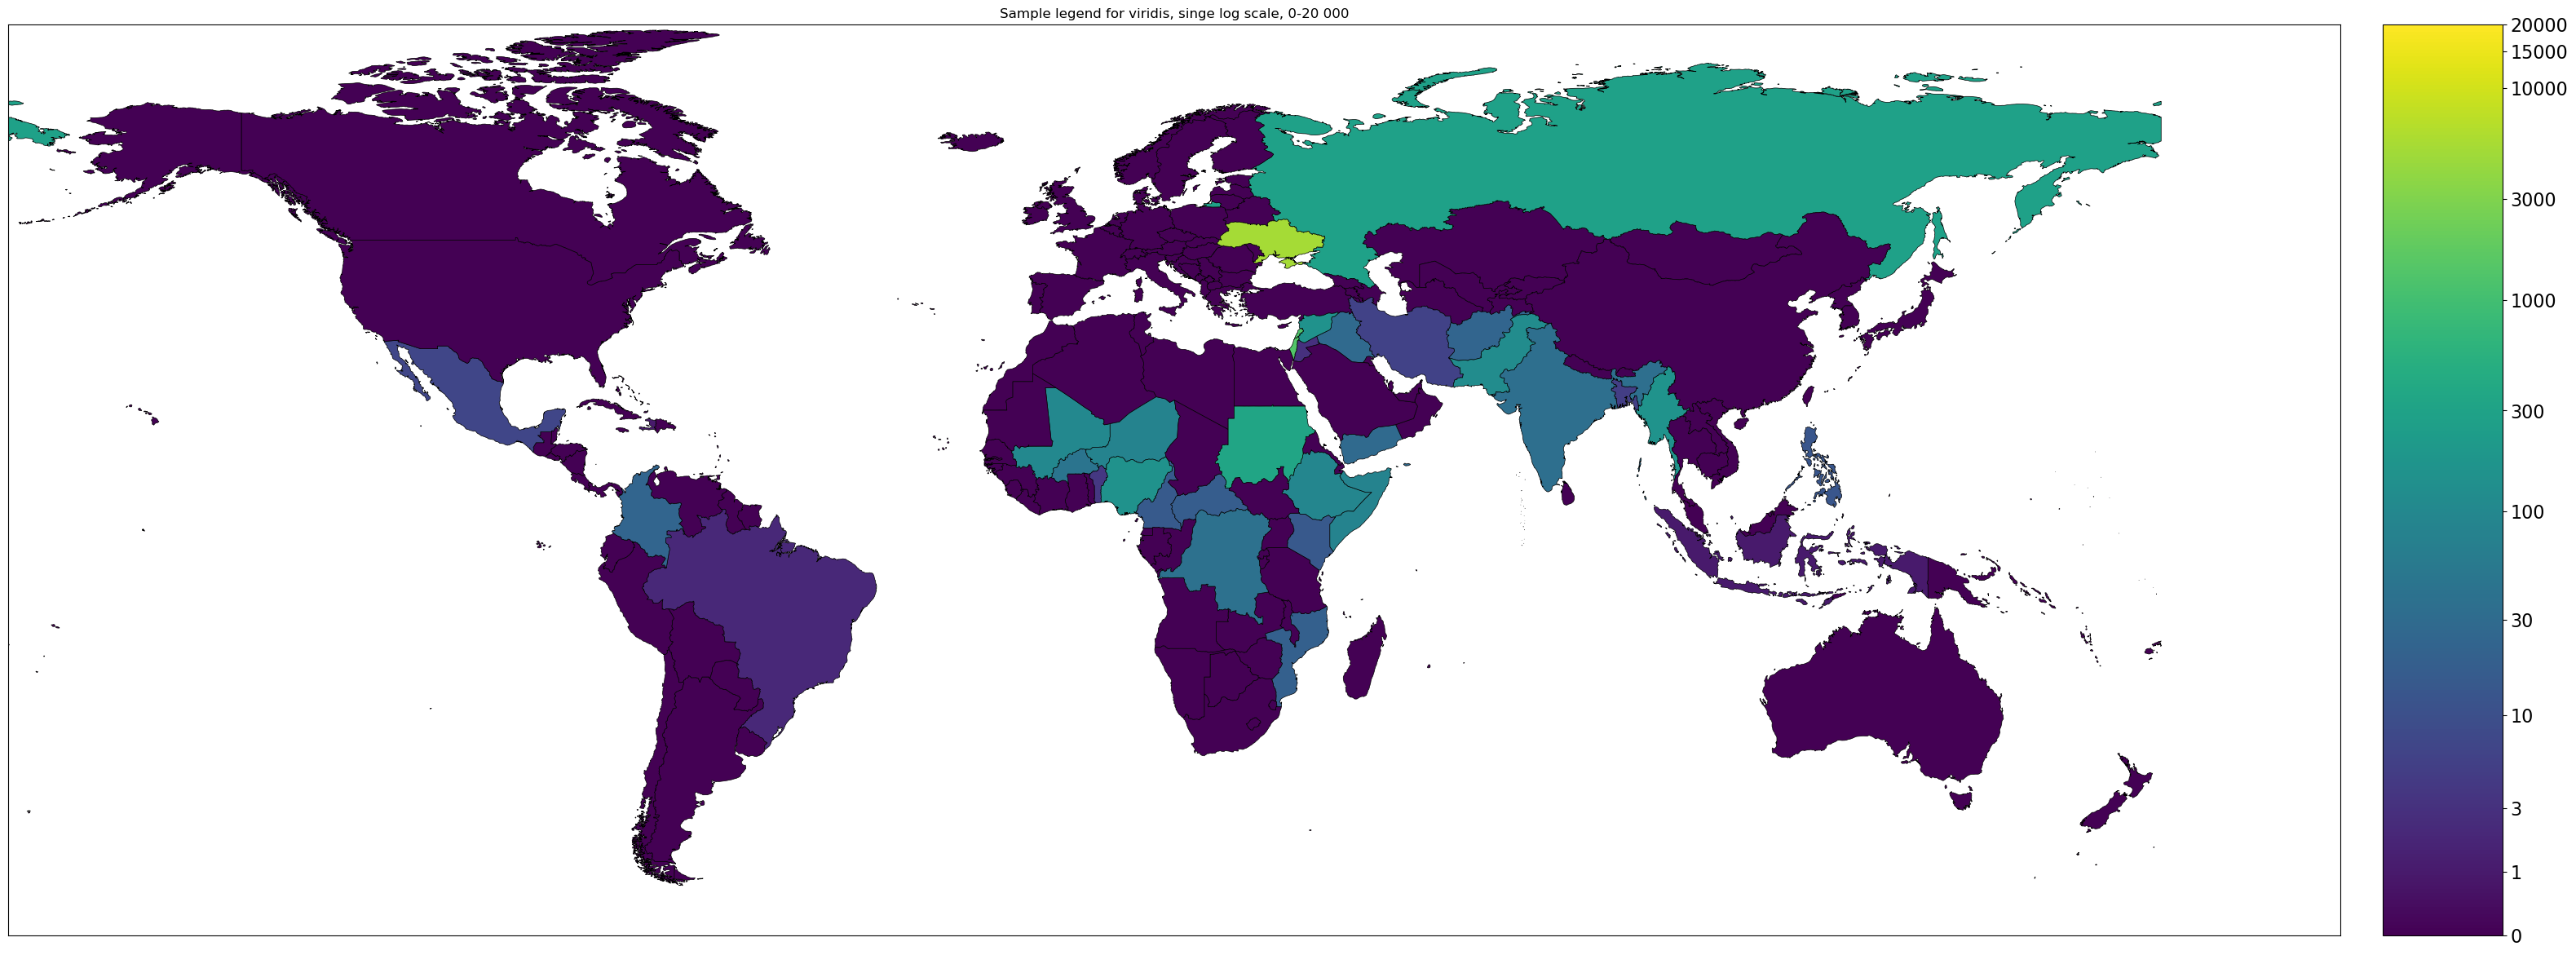

In [32]:
# Create map using cmap and map dictionary stated above

m = Mapper2(
    width=40,
    height=40,
    frame_on=True,
    title='Sample legend for viridis, singe log scale, 0-20 000',
    bbox=bbox_from_cid('globe'), 
    figure = None
).add_layer(
    gdf=gdf.loc[chosen_month],
    transparency = 1.0,
    edgecolor="black",
    linewidth=0.5,
    cmap = cmap,
    column = f'{transform}'+f'{feature}', 
    map_dictionary = map_dictionary,
)
plt.savefig(my_path+f'viridis_1p_0-20000.png', bbox_inches='tight')  # saves the current figure

In [ ]:
# Create map with custom cmap and dictionary

m = Mapper2(
    width=40,
    height=40,
    frame_on=True,
    title='Test plot',
    bbox=bbox_from_cid('globe'), 
    figure = None
).add_layer(
    gdf=gdf.loc[chosen_month],
    transparency = 1.0,
    edgecolor="black",
    linewidth=0.5,
    cmap = 'viridis', # change as needed
    column = f'{transform}'+f'{feature}', 
    map_dictionary = dictionary_stand_1p_10k_moreticks, # change to your new dict
)

In [ ]:
m.save(f'{cmap}_dictionary_dichotomous_cm', dpi = 300) # Saves to the directory in which the notebook is run

In [ ]:
print('All done!')